<a href="https://colab.research.google.com/github/lilipolinema/Project_PCVK/blob/master/rice_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

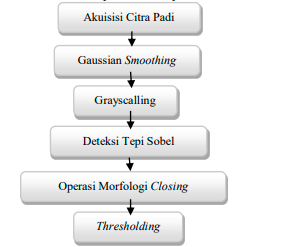

cek sini : [ilkom](https://ilkom.unnes.ac.id/snik/prosiding/2016/16.%20SNIK_339_Identifikasi%20Penyakit%20Padi.pdf)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pathlib
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from math import log10, sqrt
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# direktori data training
Images = '/content/drive/MyDrive/PCVK/UAS'

# List folder
os.listdir(Images)

['Leaf smut', 'Brown spot', 'Bacterial leaf blight']

In [ ]:
# normalisasi dan menggunakan data 20 %
#image_generator = ImageDataGenerator(rescale = 1./255,validation_split= 0.2)

In [ ]:
# Generate 40 images
# Training 80% (96) and validasi 20%(24)
# shuffling dan resizing gambar

#train_generator = image_generator.flow_from_directory(batch_size = 40, directory= Images, shuffle= True, target_size=(256,256), class_mode = 'categorical', subset="training")

Found 96 images belonging to 3 classes.


In [ ]:
#validation_generator = image_generator.flow_from_directory(batch_size = 40, directory= Images, shuffle= True, target_size=(256,256), class_mode = 'categorical', subset="validation")

Found 24 images belonging to 3 classes.


In [ ]:
# simpan gambar ke leaf_smut untuk kategori leaf smut
img_leafsmut = []
for img_smut in glob.glob('/content/drive/MyDrive/PCVK/UAS/Leaf smut/*.jpg'):
  n = cv2.imread(img_smut)
  img_leafsmut.append(n)

In [ ]:
# simpan gambar ke bacterial untuk kategori leaf bacterial
img_bacterial = []
for img_bact in glob.glob('/content/drive/MyDrive/PCVK/UAS/Bacterial leaf blight/*.jpg'):
  n = cv2.imread(img_bact)
  img_bacterial.append(n)

In [ ]:
# simpan gambar ke brown_spot untuk kategori brown spot
img_brown_spot = []
for img_brown in glob.glob('/content/drive/MyDrive/PCVK/UAS/Brown spot/*.jpg'):
  n = cv2.imread(img_brown)
  img_brown_spot.append(n)

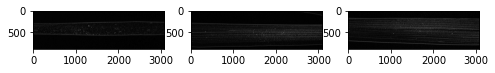

In [ ]:
# beri gaussian smoothing u/ memperbaiki kualitas citra
# ubah citra ke grayscale
leafsmut_gaussian = []
bacterial_gaussian = []
brownspot_gaussian = []

for i in range(len(img_leafsmut)):
  leafsmut_gaussian = cv2.GaussianBlur(img_leafsmut[i],(3,3),0)
  gray_leafsmut = cv2.cvtColor(leafsmut_gaussian, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  smut_sobelx = cv2.Sobel(gray_leafsmut, cv2.CV_64F, 1, 0, ksize=3)
  smut_sobely = cv2.Sobel(gray_leafsmut, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  smut_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(smut_sobelx), 0.5, cv2.convertScaleAbs(smut_sobely), 0.5, 0)


for i in range(len(img_bacterial)):
  bacterial_gaussian = cv2.GaussianBlur(img_bacterial[i],(3,3),0)
  gray_bacterial = cv2.cvtColor(bacterial_gaussian, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  bact_sobelx = cv2.Sobel(gray_bacterial, cv2.CV_64F, 1, 0, ksize=3)
  bact_sobely = cv2.Sobel(gray_bacterial, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  bact_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(bact_sobelx), 0.5, cv2.convertScaleAbs(bact_sobely), 0.5, 0)

for i in range(len(img_brown_spot)):
  brownspot_gaussian = cv2.GaussianBlur(img_brown_spot[i],(3,3),0)
  gray_brownspot = cv2.cvtColor(brownspot_gaussian, cv2.COLOR_BGR2GRAY)

  # Deteksi Tepi Sobel
  # obtaining a horizontal and vertical Sobel filtering of the image
  brownspot_sobelx = cv2.Sobel(gray_brownspot, cv2.CV_64F, 1, 0, ksize=3)
  brownspot_sobely = cv2.Sobel(gray_brownspot, cv2.CV_64F, 0, 1, ksize=3)

  # image with both horizontal and vertical Sobel kernels applied
  brownspot_sobelxy = cv2.addWeighted(cv2.convertScaleAbs(brownspot_sobelx), 0.5, cv2.convertScaleAbs(brownspot_sobely), 0.5, 0)

f, axarr = plt. subplots(1,3,figsize=(8,8))
plt.subplot(131),plt.imshow(smut_sobelxy, cmap = 'gray')
plt.subplot(132),plt.imshow(bact_sobelxy,cmap = 'gray')
plt.subplot(133),plt.imshow(brownspot_sobelxy,cmap = 'gray')
plt.show()

In [ ]:
#Operasi Morfologi – Dilasi

img = cv2.imread('/content/drive/MyDrive/PCVK/UAS/Brown spot/*.jpg',0)
ret, thresh = cv2.threshold(img, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((5,5),np.uint8)
dilasi = cv2.dilate(thresh,kernel,iterations = 1)
 
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh,cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(dilasi,cmap = 'gray')
plt.title('Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()